**Ejercicio 1:** La biblioteca dispone de la función train test split, que permite generar una partición de entrenamiento y prueba, y KFold, que genera varias particiones de validación cruzada.
Estudie el uso de estas funciones y utilícelas para generar particiones a partir del conjunto de datos Digits que en Scikit-learn puede cargarse usando la función load digits del módulo datasets.
Mediante MLPClassifier construya un perceptrón multicapa adecuado para este conjunto de datos y analice su desempeño considerando:
- 1 única partición de datos genererada mediante train test split,
- 5 particiones generadas mediante KFold,
- 10 particiones generadas mediante KFold.

Para el análisis tenga en cuenta la media y la varianza de la tasa de acierto obtenida en cada partición.

#### **Librerías**

In [47]:
import numpy as np
import matplotlib.pyplot as plt       
from tabulate import tabulate                           # Para generar tablas

from sklearn import datasets                            # Módulo para cargar datos
from sklearn.neural_network import MLPClassifier        # Módulo para construir perceptrón multicapa

# Modelos de partición:
from sklearn.model_selection import train_test_split    # Caso 1
from sklearn.model_selection import KFold               # Casos 2 y 3

# Medidas de desempeño:
from sklearn.metrics import accuracy_score              # Precisión
from sklearn.metrics import confusion_matrix            # Para generar matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

#### **Inicialización**

Levanto los datos del conjunto Digits y armo mi perceptrón multicapa para probar el desempeño con las distintas particiones.

In [48]:
# Cargo los datos Digits:
X_digits,y_digits = datasets.load_digits(return_X_y=True)  

# Genero mi perceptrón multicapa:
clf = MLPClassifier(hidden_layer_sizes=(20,10),learning_rate_init=0.005, max_iter=1000, activation='logistic')

Para los casos 2 y 3, podemos generar una función auxiliar que genere n particiones según un argumento que le pasemos junto al conjunto de datos. Como KFold toma como número de particiones por defecto al 5, lo seteamos de esta manera en los argumentos de la función también.

También hacemos una función auxiliar para generar los resultados de las medidas de precisión y la tabulación por particiones.

In [49]:
def generar_kfold(X_digits,y_digits,clf,n_particiones=5):
    kf = KFold(n_splits=n_particiones)
    ACC = []

    for train_index, test_index in kf.split(X_digits):
        X_train, X_test = X_digits[train_index], X_digits[test_index]
        y_train, y_test = y_digits[train_index], y_digits[test_index]

        clf.fit(X_train, y_train)       # Entreno perceptrón con el conjunto de datos obtenido.
        y_pred = clf.predict(X_test)    # Obtengo salida con datos de prueba
        ACC_aux = accuracy_score(y_test,y_pred)
        ACC.append(ACC_aux)

    return ACC

def medidas(ACC):
    # Medidas globales
    print('Exactitud media:',np.mean(ACC))
    print('Varianza de la exactitud:',np.var(ACC))
    # Medidas tabla
    table_data = [[x,y] for x, y in zip(range(1,len(ACC)+1), ACC)]
    headers = ['N° Partición','Precisión']
    table = tabulate(table_data, headers, tablefmt='simple_grid',stralign='center',numalign='center')
    print(table)

##### **Caso 1:** Una única partición de datos generada mediante train test split.

Exactitud: 0.9646464646464646


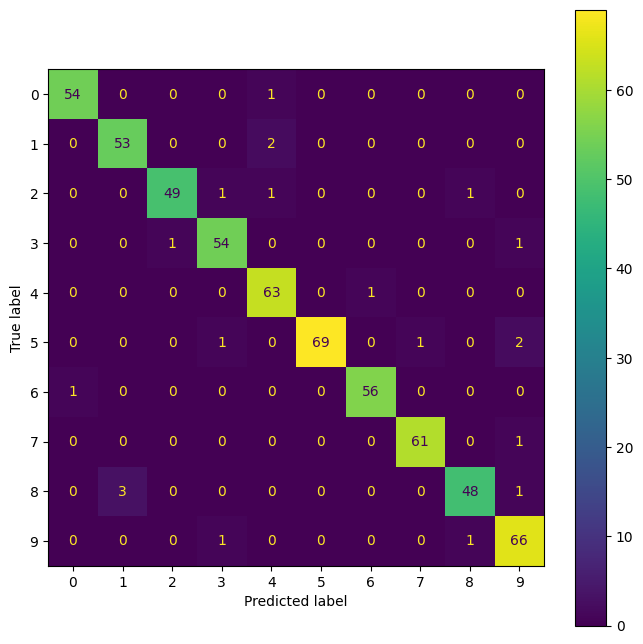

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)       # Entreno perceptrón con el conjunto de datos obtenido.

# Precisión
y_pred = clf.predict(X_test)
ACC = accuracy_score(y_test,y_pred)
print('Exactitud:',ACC)

# Matriz de confusión
MC = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=MC)
fig,ax = plt.subplots(figsize=(8,8))
disp.plot(ax=ax)

##### **Caso 2:** 5 particiones generadas mediante KFold

In [51]:
ACC = generar_kfold(X_digits,y_digits,clf)
medidas(ACC)

Exactitud media: 0.9042804085422471
Varianza de la exactitud: 0.0011516447558428144
┌────────────────┬─────────────┐
│  N° Partición  │  Precisión  │
├────────────────┼─────────────┤
│       1        │  0.941667   │
├────────────────┼─────────────┤
│       2        │    0.875    │
├────────────────┼─────────────┤
│       3        │  0.913649   │
├────────────────┼─────────────┤
│       4        │  0.935933   │
├────────────────┼─────────────┤
│       5        │  0.855153   │
└────────────────┴─────────────┘


##### **Caso 3:** 10 particiones generadas mediante KFold

In [52]:
n_particiones = 10
ACC = generar_kfold(X_digits,y_digits,clf,n_particiones)
medidas(ACC)

Exactitud media: 0.9226412166356301
Varianza de la exactitud: 0.0008716633221863516
┌────────────────┬─────────────┐
│  N° Partición  │  Precisión  │
├────────────────┼─────────────┤
│       1        │  0.916667   │
├────────────────┼─────────────┤
│       2        │  0.961111   │
├────────────────┼─────────────┤
│       3        │  0.888889   │
├────────────────┼─────────────┤
│       4        │  0.883333   │
├────────────────┼─────────────┤
│       5        │  0.933333   │
├────────────────┼─────────────┤
│       6        │  0.933333   │
├────────────────┼─────────────┤
│       7        │  0.955556   │
├────────────────┼─────────────┤
│       8        │  0.960894   │
├────────────────┼─────────────┤
│       9        │  0.882682   │
├────────────────┼─────────────┤
│       10       │  0.910615   │
└────────────────┴─────────────┘
